In [2]:
import pandas as pd
df = pd.read_csv('/winequality-red.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['quality'].value_counts())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

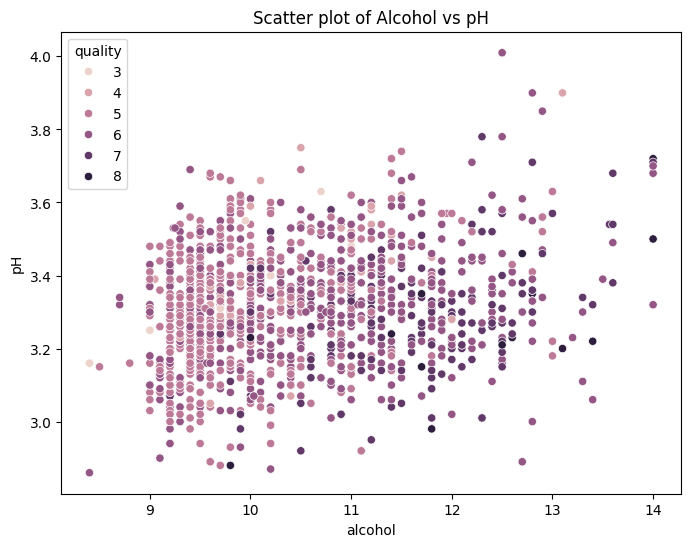

In [3]:
#(i)Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df)
plt.title("Scatter plot of Alcohol vs pH")
plt.show()

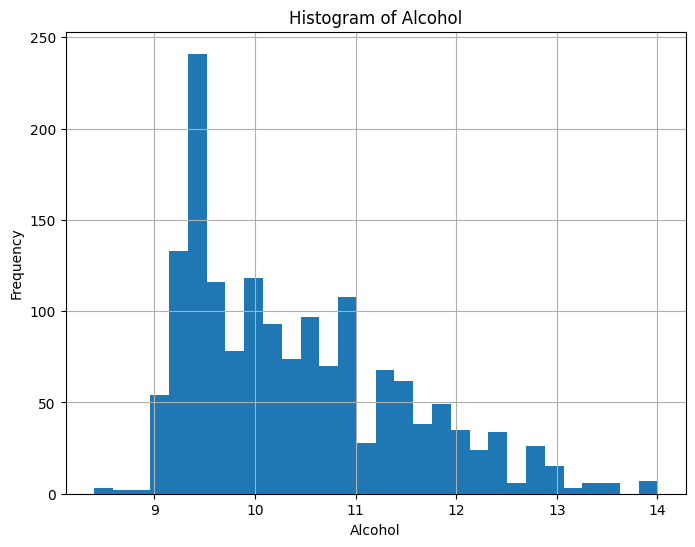

In [4]:
# (ii) Histogram
plt.figure(figsize=(8, 6))
df['alcohol'].hist(bins=30)
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

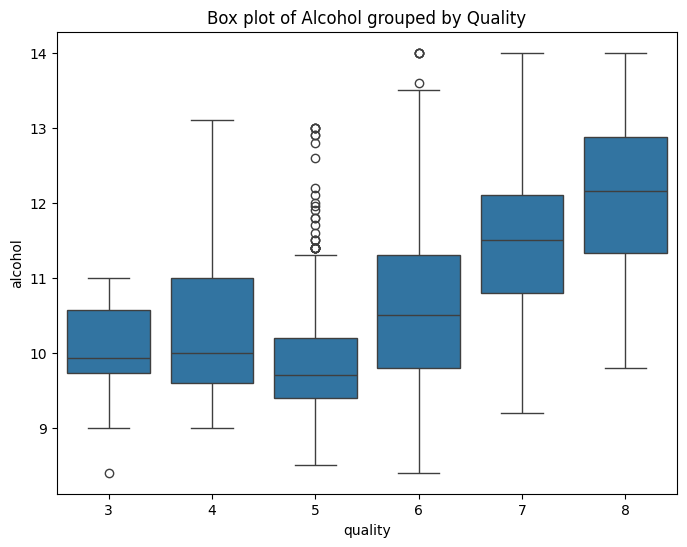

In [5]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Box plot of Alcohol grouped by Quality")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df_cleaned = df.dropna()
X = df_cleaned.drop(['quality'], axis=1)
y = df_cleaned['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  y_pred = knn.predict(X_test_scaled)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with k={k}: {accuracy:.4f}")

Accuracy with k=1: 0.6281
Accuracy with k=3: 0.5687
Accuracy with k=5: 0.5563
Accuracy with k=7: 0.5437
Accuracy with k=9: 0.5687
Accuracy with k=11: 0.5781
Accuracy with k=13: 0.5844
Accuracy with k=15: 0.5531


In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
k_values_input = input("Enter k values : ")
k_values = [int (k.strip()) for k in k_values_input.split(',')]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with k={k}: {accuracy:.4f}")

Enter k values : 3 ,5, 7
Accuracy with k=3: 0.5687
Accuracy with k=5: 0.5563
Accuracy with k=7: 0.5437
